# Creating Publication-Quality Graphics with ggplot2 - JASMINE'S TEACHING NOTES

In [9]:
library(ggplot2)
library(gapminder)

## Transformations and statistics

ggplot2 also makes it easy to overlay statistical models over the data. To
demonstrate we'll go back to our first example:

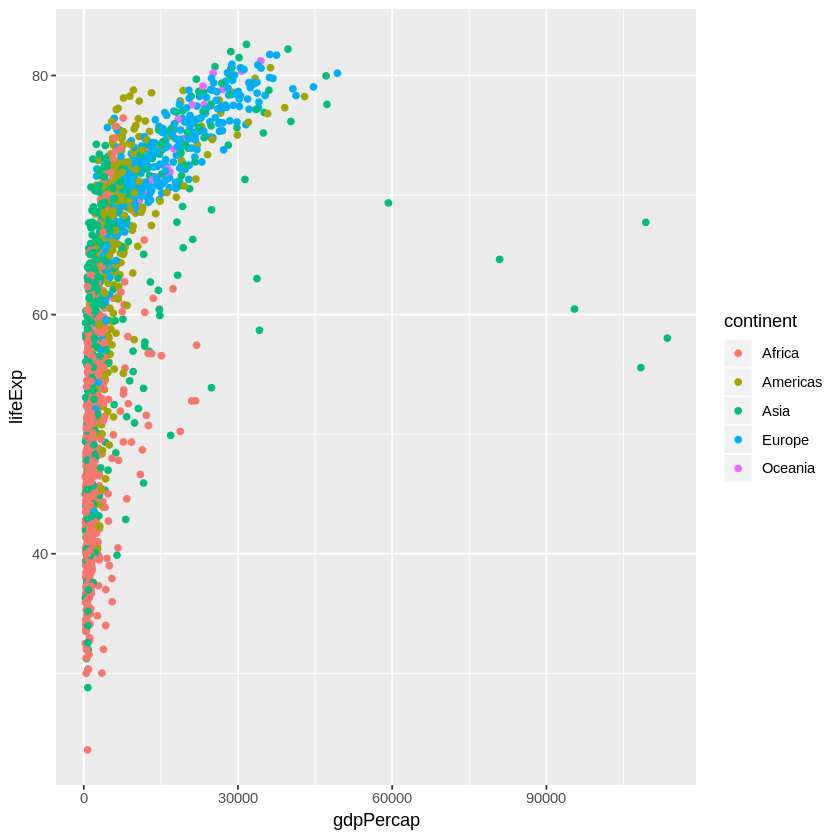

In [10]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp, color=continent)) +
  geom_point()

Currently it's hard to see the relationship between the points due to some strong
outliers in GDP per capita. We can change the scale of units on the x axis using
the *scale* functions. These control the mapping between the data values and
visual values of an aesthetic. We can also modify the transparency of the
points, using the *alpha* function, which is especially helpful when you have
a large amount of data which is very clustered.

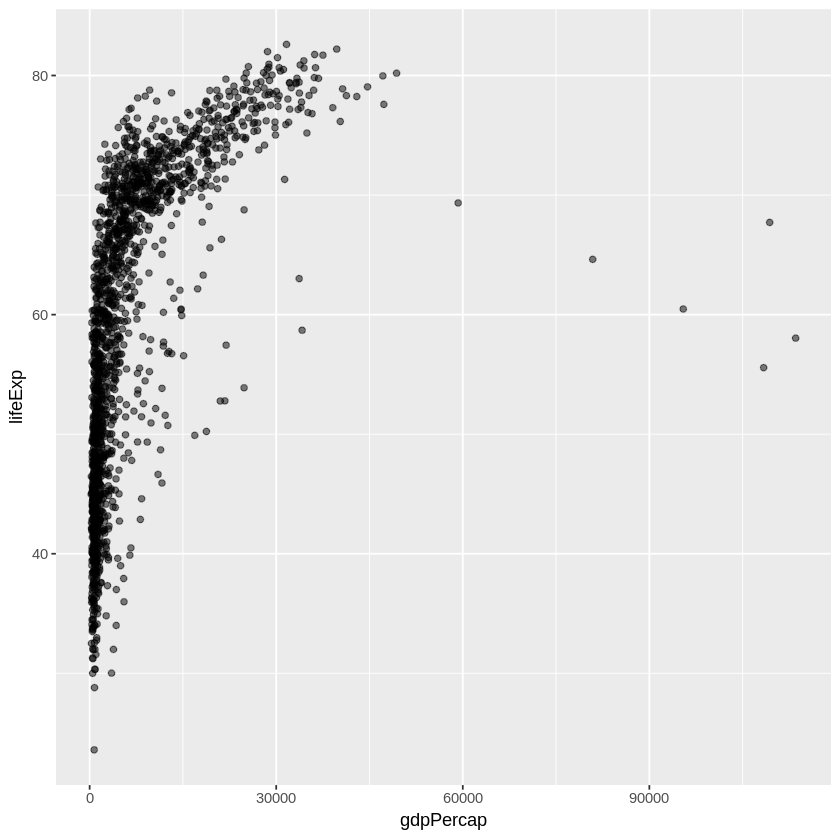

In [11]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5)

The `log10` function applied a transformation to the values of the gdpPercap
column before rendering them on the plot, so that each multiple of 10 now only
corresponds to an increase in 1 on the transformed scale, e.g. a GDP per capita
of 1,000 is now 3 on the y axis, a value of 10,000 corresponds to 4 on the y
axis and so on. This makes it easier to visualize the spread of data on the
x-axis.

We can fit a simple relationship to the data by adding another layer,
`geom_smooth`:

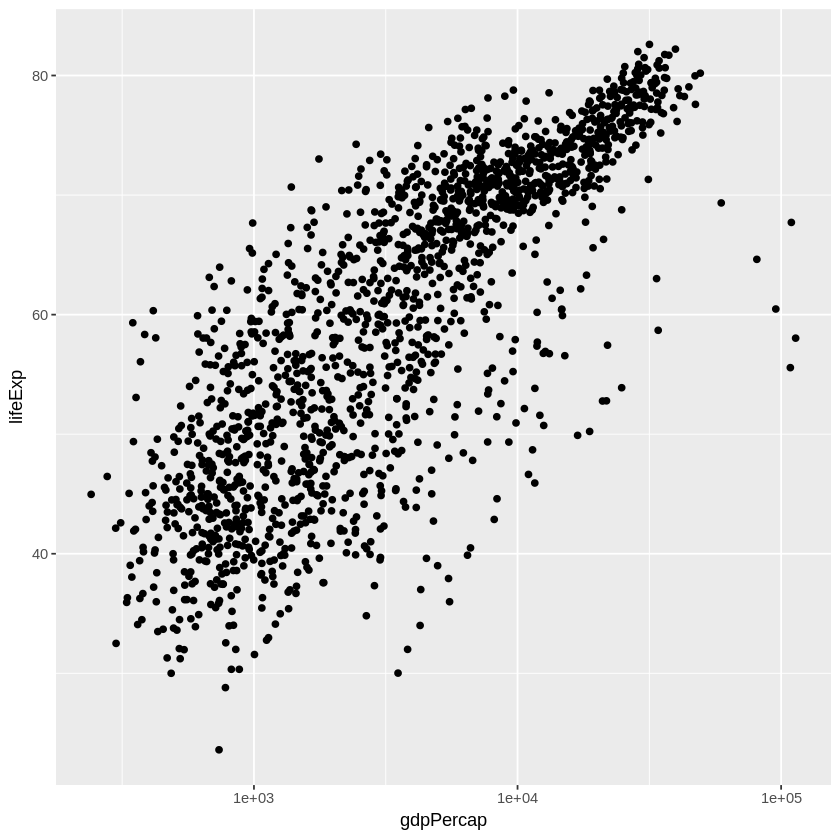

In [12]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() + scale_x_log10()

We can make the line thicker by *setting* the **size** aesthetic in the
`geom_smooth` layer:

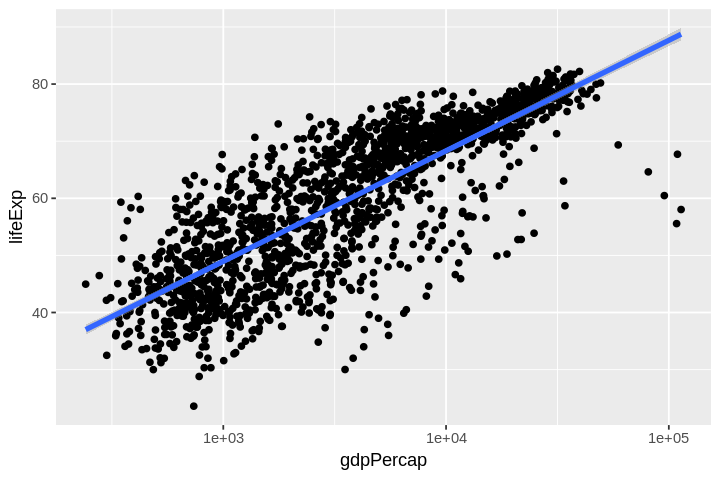

In [16]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() + scale_x_log10() + geom_smooth(method="lm")

There are two ways an *aesthetic* can be specified. Here we *set* the **size**
aesthetic by passing it as an argument to `geom_smooth`. Previously in the
lesson we've used the `aes` function to define a *mapping* between data
variables and their visual representation.

### Challenge 4a

Modify the color and size of the points on the point layer in the previous example.

Hint: do not use the aes function.

In [17]:
# Answer to Challenge 4a

### Challenge 4b

Modify your solution to Challenge 4a so that the points are now a different shape and are colored by continent with new trendlines. Hint: The color argument can be used inside the aesthetic.

Hint: Possible shapes and corresponding values

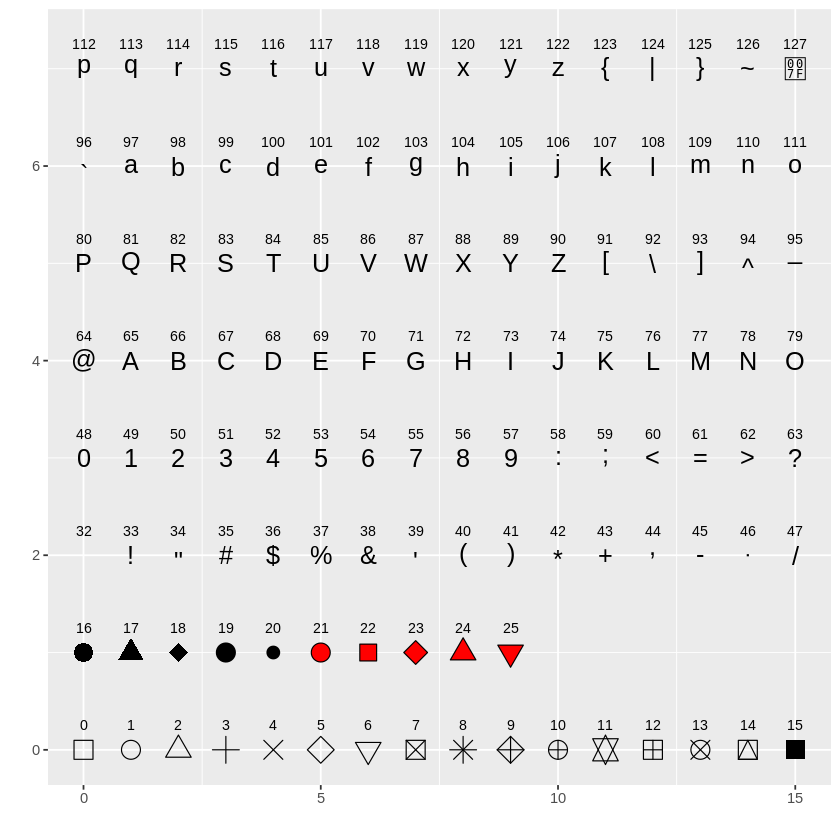

In [22]:
d=data.frame(p=c(0:25,32:127))
ggplot() +
scale_y_continuous(name="") +
scale_x_continuous(name="") +
scale_shape_identity() +
geom_point(data=d, mapping=aes(x=p%%16, y=p%/%16, shape=p), size=5, fill="red") +
geom_text(data=d, mapping=aes(x=p%%16, y=p%/%16+0.25, label=p), size=3)

In [ ]:
# Answer to Challenge 4b


## Multi-panel figures

Earlier we visualized the change in life expectancy over time across all
countries in one plot. Alternatively, we can split this out over multiple panels
by adding a layer of **facet** panels. Focusing only on those countries with
names that start with the letter "A" or "Z".

Getting the first letter for all the countries

* make sure tidyverse is loaded

In [ ]:
library(tidyverse)

using your new found knowledge of dplyr:

check to see you indeed subsetted correctly

country,continent,year,lifeExp,pop,gdpPercap,starts.with
Afghanistan,Asia,1952,28.801,8425333,779.4453,A
Afghanistan,Asia,1957,30.332,9240934,820.8530,A
Afghanistan,Asia,1962,31.997,10267083,853.1007,A
Afghanistan,Asia,1967,34.020,11537966,836.1971,A
Afghanistan,Asia,1972,36.088,13079460,739.9811,A
Afghanistan,Asia,1977,38.438,14880372,786.1134,A


country,continent,year,lifeExp,pop,gdpPercap,starts.with
Zimbabwe,Africa,1982,60.363,7636524,788.8550,Z
Zimbabwe,Africa,1987,62.351,9216418,706.1573,Z
Zimbabwe,Africa,1992,60.377,10704340,693.4208,Z
Zimbabwe,Africa,1997,46.809,11404948,792.4500,Z
Zimbabwe,Africa,2002,39.989,11926563,672.0386,Z
Zimbabwe,Africa,2007,43.487,12311143,469.7093,Z


Plot the newly subsetted data:

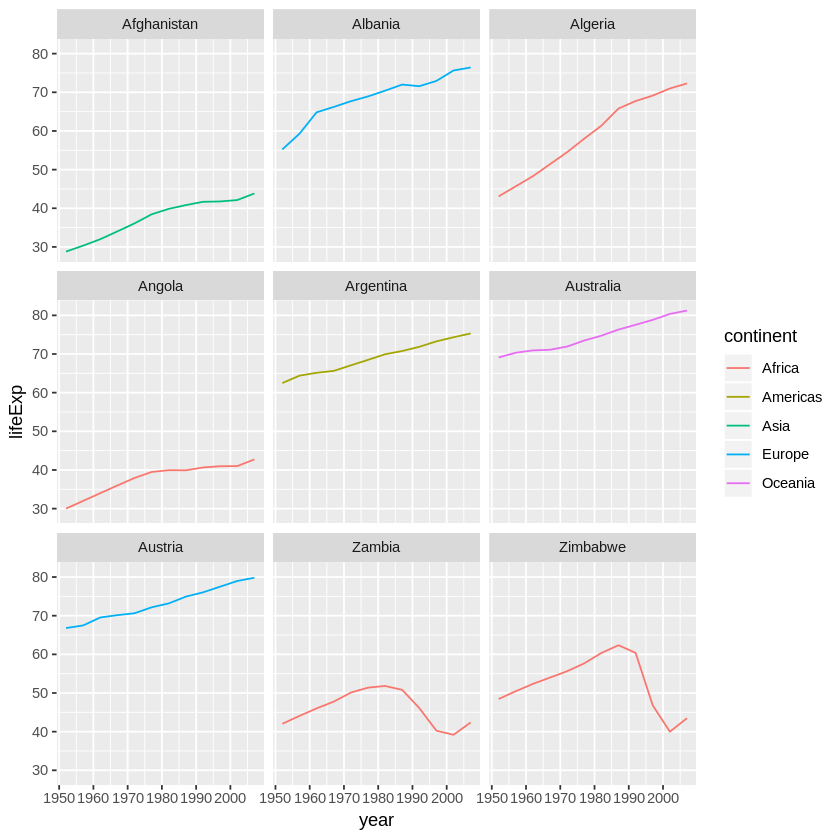

The `facet_wrap` layer took a "formula" as its argument, denoted by the tilde
(~). This tells R to draw a panel for each unique value in the country column
of the gapminder dataset.

* kind of like by used previously but now with different panels
* you can also facet by two things by writing `facet_wrap( thing2 ~ country)`


## Modifying text

To clean this figure up for a publication we need to change some of the text
elements. The x-axis is too cluttered, and the y axis should read
"Life expectancy", rather than the column name in the data frame.

We can do this by adding a couple of different layers. The **theme** layer
controls the axis text, and overall text size. Labels for the axes, plot 
title and any legend can be set using the `labs` function. Legend titles
are set using the same names we used in the `aes` specification. Thus below
the color legend title is set using `color = "Continent"`, while the title 
of a fill legend would be set using `fill = "MyTitle"`. 

In [21]:
## note can skip
#theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

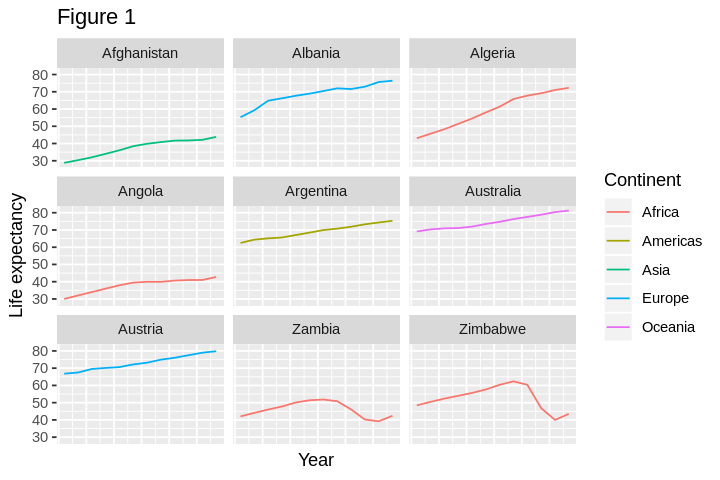

In [22]:
ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
  geom_line() + facet_wrap( ~ country)

### Challenge 5

Create a density plot of GDP per capita, filled by continent.

Advanced:

Transform the x axis to better visualise the data spread.
Add a facet layer to panel the density plots by year.

## Exporting the plot

The `ggsave()` function allows you to export a plot created with ggplot. You can specify the dimension and resolution of your plot by adjusting the appropriate arguments (`width`, `height` and `dpi`) to create high quality graphics for publication. In order to save the plot from above, we first assign it to a variable `lifeExp_plot`, then tell `ggsave` to save that plot in `png` format.

There are two nice things about `ggsave`. First, it defaults to the last plot, so if you omit the `plot` argument it will automatically save the last plot you created with `ggplot`. Secondly, it tries to determine the format you want to save your plot in from the file extension you provide for the filename (for example `.png` or `.pdf`). If you need to, you can specify the format explicitly in the `device` argument.

In [21]:
lifeExp_plot <- ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
  geom_line() + facet_wrap( ~ country) +
  labs(
    x = "Year",              # x axis title
    y = "Life expectancy",   # y axis title
    title = "Figure 1",      # main title of figure
    color = "Continent"      # title of legend
  ) +
  theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())



After running the code if we go back to the files (click the jupyter logo) and you should see a new file "lifeExp.png" there. (remember to save before!)

### Challenge 6

Save the following plot:

```ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() + scale_x_log10() + geom_smooth(method="lm", size=1.5)``` 

as `jpg` with a width of `5` and a height of `6`

In [ ]:
# Answer to Challenge 6


## Beyond R beginnner
This is a taste of what you can do with ggplot2.

With the basics in ggplot you can expand your data visualization skill to beyond making just scatter and line plots

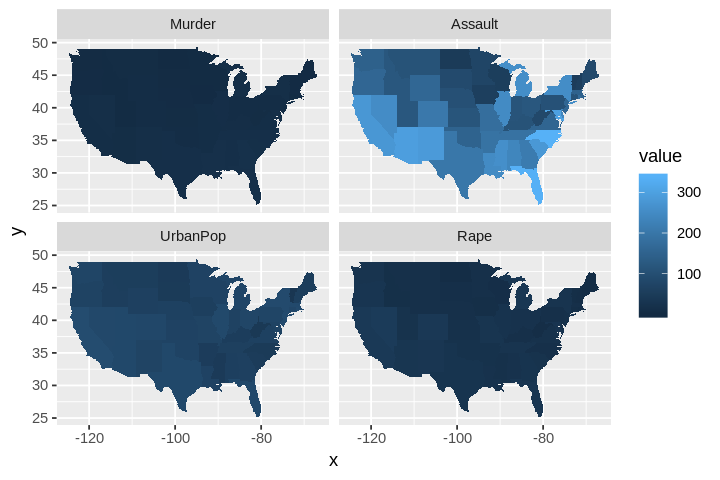

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


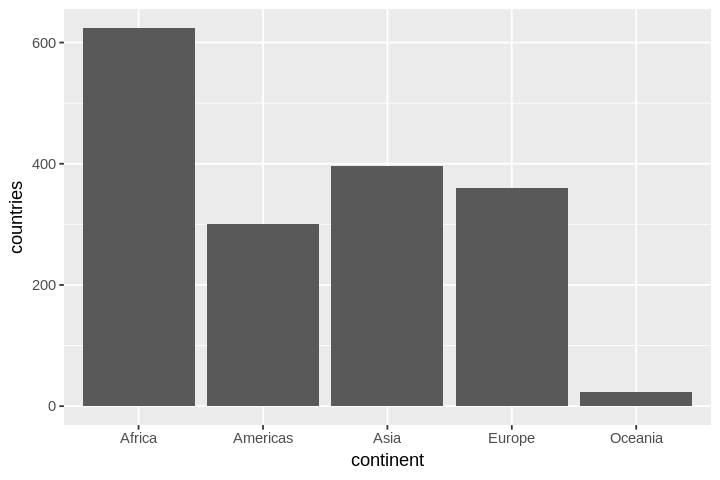

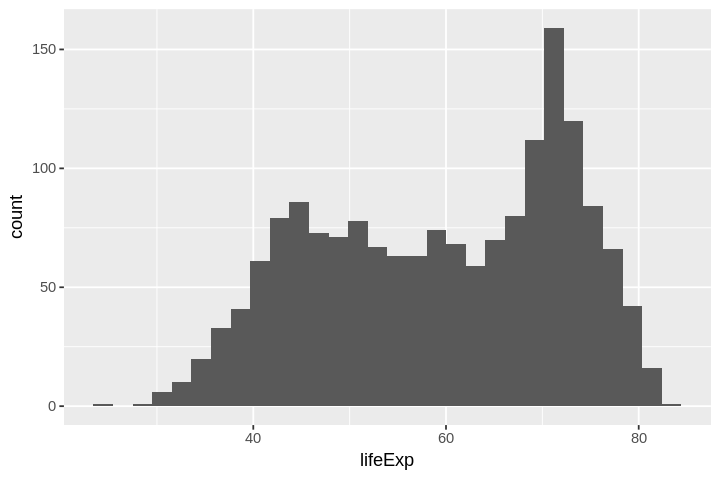

In [40]:
# example from geom_map
crimes <- data.frame(state = tolower(rownames(USArrests)), USArrests)
crimesm <- reshape2::melt(crimes, id = 1)
if (require(maps)) {
  states_map <- map_data("state")
  ggplot(crimes, aes(map_id = state)) +
    geom_map(aes(fill = Murder), map = states_map) +
    expand_limits(x = states_map$long, y = states_map$lat)

  last_plot() + coord_map()
  ggplot(crimesm, aes(map_id = state)) +
    geom_map(aes(fill = value), map = states_map) +
    expand_limits(x = states_map$long, y = states_map$lat) +
    facet_wrap( ~ variable)
}

#random bar graph using gapminder data
ggplot(gapminder, aes( x = continent)) +
geom_bar() +
ylab("countries")

#random histogram
ggplot(gapminder, aes(x = lifeExp)) +
geom_histogram()

### Resources

RStudio provides a really useful [cheat sheet][cheat] of the different layers available, and more
extensive documentation is available on the [ggplot2 website][ggplot-doc].
Finally, if you have no idea how to change something, a quick Google search will
usually send you to a relevant question and answer on Stack Overflow with reusable
code to modify!

Also:
R4 Data Science - https://r4ds.had.co.nz/index.html

### Getting today's materials
All notebooks used today are available on the rstudy group [github repo][git]. Click the green `clone or download` if you don't have a github account to download to your computer.

You can also go to `file > download as` to save the notebook in other formats if you would like to work in something other than jupyter notebooks

[cheat]: http://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf
[ggplot-doc]: http://docs.ggplot2.org/current/
[git]: https://github.com/UBC-R-Study-group/intro_r_workshop